In [66]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import normaltest

In [67]:
df = pd.read_csv('iris.csv', header=0)
df.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [68]:
df = df.dropna()
df = df.drop_duplicates() 
df.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [69]:
df.value_counts("species")

species
versicolor    50
virginica     49
setosa        48
Name: count, dtype: int64

## A) MEDIA, VARIANCIA, DESVIO PADRAO E MEDIANA

In [70]:
# Media
mediax = df['sepal_length'].mean()
mediay = df['sepal_width'].mean()

print("Sepal_length: %.2f" % mediax)
print("Sepal_width: %.2f" % mediay)

Sepal_length: 5.86
Sepal_width: 3.06


In [71]:
# Varianca
varianciax = df['sepal_length'].var()
varianciay = df['sepal_width'].var()
print("Sepal_length: %.2f " % varianciax)
print("Sepal_width: %.2f" % varianciay)

Sepal_length: 0.69 
Sepal_width: 0.19


In [72]:
# Desvio Padrao
desviopx = df['sepal_length'].std()
desviopy = df['sepal_width'].std()
print("Sepal_length: %.2f" % desviopx)
print("Sepal_width: %.2f" % desviopy)

Sepal_length: 0.83
Sepal_width: 0.44


In [73]:
# Mediana
medianax = df['sepal_length'].median()
medianay = df['sepal_width'].median()
print("Sepal_length: %.2f " % medianax)
print("Sepal_width: %.2f" % medianay)

Sepal_length: 5.80 
Sepal_width: 3.00


## B) HISTOGRAMA

(array([ 9., 21., 14., 27., 15., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

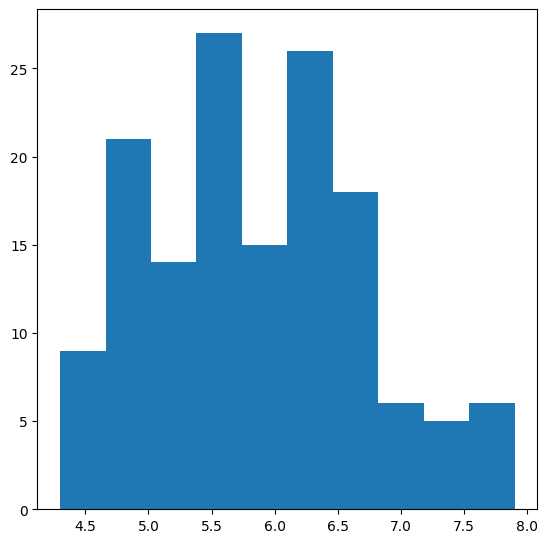

In [74]:
# Histograma
janela = plt.figure(figsize=(5,5))
grafico = janela.add_axes([0,0,1,1])
grafico.hist(df['sepal_length'])

(array([ 4.,  7., 21., 24., 36., 31.,  9., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <BarContainer object of 10 artists>)

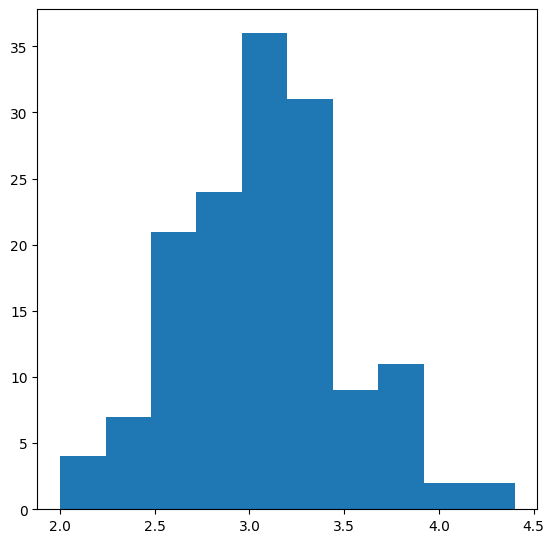

In [75]:
# Histrograma y
janela = plt.figure(figsize=(5,5))
grafico = janela.add_axes([0,0,1,1])
grafico.hist(df['sepal_width'])

### C) BOXPLOT 

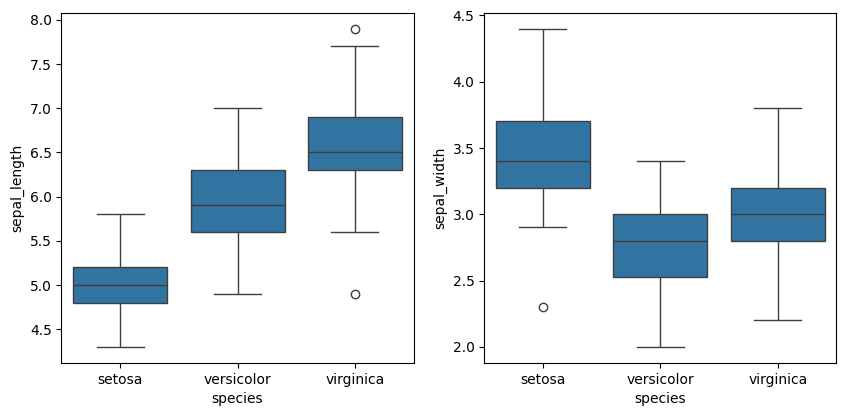

In [76]:
# Boxplot de x e y
def graph(y):
    sns.boxplot(x="species", y=y, data=df)
 
plt.figure(figsize=(10,10))  
plt.subplot(221)
graph('sepal_length')
plt.subplot(222)
graph('sepal_width')

## D) COEFICIENTE DE CORRELACAO

In [108]:
# Coeficiente de correlacao
df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

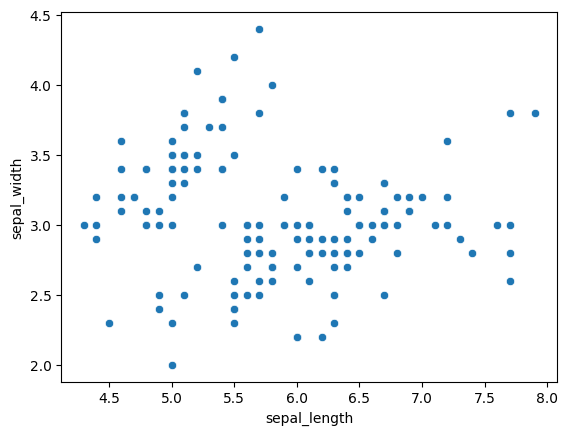

In [109]:
sns.scatterplot( data=df, x='sepal_length', y='sepal_width')

## E) TESTE DE NORMALIDADE

In [110]:
# Teste de normalidade
alpha = 0.05 
k2, p = normaltest(df.sepal_length)
print("Variavel x:")
print("k2: ", k2)
print("p-valor: ", p)

if p < alpha:
    print("A hipótese nula pode ser rejeitada")
else:    
    print("A hipótese nula não pode ser rejeitada")

Variavel x:
k2:  5.365754202483152
p-valor:  0.0683661745193887
A hipótese nula não pode ser rejeitada


In [111]:
alpha = 0.05 
k2, p = normaltest(df.sepal_width)
print("Variavel y: ")
print("k2: ", k2)
print("p-valor: ", p)

if p < alpha:
    print("A hipótese nula pode ser rejeitada")
else:    
    print("A hipótese nula não pode ser rejeitada")

Variavel y: 
k2:  3.2122174550988825
p-valor:  0.20066694655512007
A hipótese nula não pode ser rejeitada


## F) Gráfico do teste de normalidade junto com o histograma 

C:\Users\vitor\AppData\Local\Temp\ipykernel_16172\327320551.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sepal_length'], color="blue")


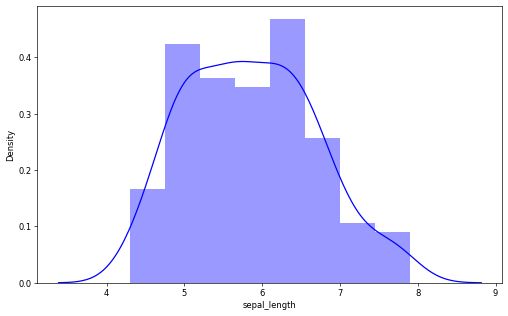

In [112]:
# Grafico histograma e normalidade de x
plt.figure(figsize=(10,6), dpi= 60)
sns.distplot(df['sepal_length'], color="blue")
plt.show()

C:\Users\vitor\AppData\Local\Temp\ipykernel_16172\969299808.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sepal_width'], color="blue")


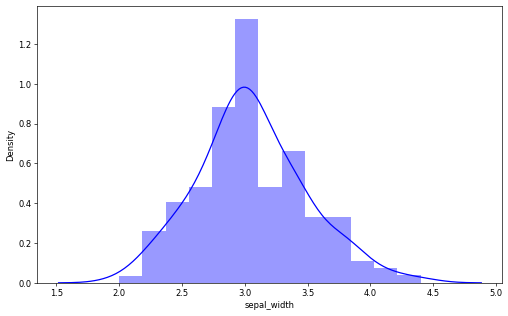

In [113]:
# Grafico histograma e normalidade de x
plt.figure(figsize=(10,6), dpi= 60)
sns.distplot(df['sepal_width'], color="blue")
plt.show()